### Pyber - Solved Version

 * Seeing the success of notable players like Uber and Lyft, we've decided to join a fledgling ride sharing company of our own. With that we'll be expected to offer data-backed guidance on new opportunities for market differentiation.
  
  * We've since been given access to the company's complete record set of rides within two datasets: 
    
    1. `city_data.csv`
    
    2. `ride_data.csv`
    
  * These contain information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

  * Our first objective is to build a scatter plot that showcases the relationship between four key variables:

    * Average Fare ($) Per City.
    
    * Total Number of Rides Per City.
    
    * Total Number of Drivers Per City.

    * City Type (Urban, Suburban, Rural).

In [2]:
%matplotlib inline

In [3]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Load data from the csv file
city_data = pd.read_csv('../Resources/city_data.csv')
ride_data = pd.read_csv('../Resources/ride_data.csv')

In [5]:
# Read the city_data
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Read the ride_data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
# Combine both datasets into one
city_ride_data = pd.merge(ride_data, city_data, how='left', on=['city'])
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


### Ride Sharing Data Scatter Plot

In [9]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_data[city_ride_data['type']=='Urban']
suburban_cities = city_ride_data[city_ride_data['type']=='Suburban']
rural_cities = city_ride_data[city_ride_data['type']=='Rural']

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

urban_cities = city_ride_data[city_ride_data['type']=='Urban']
suburban_cities = city_ride_data[city_ride_data['type']=='Suburban']
rural_cities = city_ride_data[city_ride_data['type']=='Rural']

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

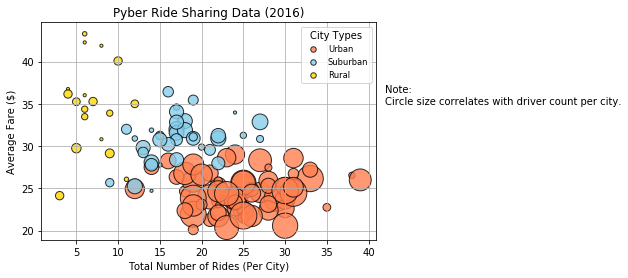

In [10]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/pyber_scatter.png")

# Show plot
plt.show()

### Bar Chart Percentage

In [11]:
# Calculate percentage 
type_percent = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()
driver_percents = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()
ride_percents = 100 * city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()

In [12]:
# Convert all three percent series into a DataFrame
percent_df = pd.concat([type_percent, driver_percents, ride_percents], axis=1).reset_index()
percent_df

,type,fare,driver_count,ride_id
0,Rural,6.811493,2.623613,5.263158
1,Suburban,30.463872,16.481668,26.315789
2,Urban,62.724635,80.894719,68.421053


In [13]:
# Setting the positions and width for the bars
pos = list(range(len(percent_df['fare']))) 
width = 0.25 

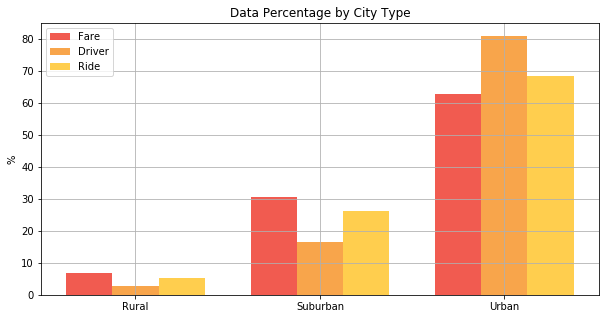

In [14]:
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with fare data in position pos
ax.bar(pos, 
       percent_df['fare'], 
       width, 
       alpha=0.8, 
       color='#EE3224', 
       label=percent_df['type'][0])

# Create a bar with mid_score data in position pos + some width buffer
ax.bar([p + width for p in pos],
        percent_df['driver_count'], 
        width, 
        alpha=0.8,        
        color='#F78F1E', 
        label=percent_df['type'][1])

# Create a bar with mid_score data in position pos + some width buffer
ax.bar([p + width*2 for p in pos],
        percent_df['ride_id'], 
        width, 
        alpha=0.8, 
        color='#FFC222', 
        label=percent_df['type'][2])

# Set the y axis label
ax.set_ylabel('%')

# Set the chart's title
ax.set_title('Data Percentage by City Type')

# Set the position of the x ticks
ax.set_xticks([p + width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(percent_df['type'])

# Adding legend, grid, showing and saving the plot
plt.legend(['Fare', 'Driver', 'Ride'], loc='upper left')
plt.grid()
plt.savefig('../Images/pyber_bar.png')
plt.show()